In [140]:
import geopandas as gpd
from rasterstats import zonal_stats
from IPython.core.pylabtools import figsize
import contextily as cx
import matplotlib.pyplot as plt


In [141]:
figsize(8,8)

In [192]:
url_CT = "https://data.cityofnewyork.us/api/geospatial/63ge-mke6?accessType=DOWNLOAD&method=export&format=GeoJSON"

In [195]:
census_tracts = gpd.read_file(url_CT)

In [199]:
census_tracts

,shape_area,ntaname,cdtaname,shape_leng,boroname,ct2020,nta2020,borocode,cdeligibil,geoid,boroct2020,cdta2020,ctlabel,geometry
0,1844421.2457,The Battery-Governors Island-Ellis Island-Libe...,MN01 Financial District-Tribeca (CD 1 Equivalent),11023.0485015,Manhattan,000100,MN0191,1,None,36061000100,1000100,MN01,1,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
1,972312.140355,Chinatown-Two Bridges,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4754.49524739,Manhattan,000201,MN0301,1,None,36061000201,1000201,MN03,2.01,"MULTIPOLYGON (((-73.98450 40.70951, -73.98655 ..."
2,2582705.23446,Chinatown-Two Bridges,MN03 Lower East Side-Chinatown (CD 3 Equivalent),6976.28645635,Manhattan,000600,MN0301,1,None,36061000600,1000600,MN03,6,"MULTIPOLYGON (((-73.99022 40.71440, -73.98934 ..."
3,1006116.58429,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),5075.33199978,Manhattan,001401,MN0302,1,None,36061001401,1001401,MN03,14.01,"MULTIPOLYGON (((-73.98837 40.71645, -73.98754 ..."
4,1226206.24719,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4459.1560187,Manhattan,001402,MN0302,1,None,36061001402,1001402,MN03,14.02,"MULTIPOLYGON (((-73.98507 40.71908, -73.98423 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,2674908.16878,St. George-New Brighton,SI01 North Shore (CD 1 Equivalent),7325.09141008,Staten Island,007700,SI0101,5,None,36085007700,5007700,SI01,77,"MULTIPOLYGON (((-74.08709 40.64033, -74.08721 ..."
2321,1909109.97602,Long Island City-Hunters Point,QN02 Long Island City-Sunnyside-Woodside (CD 2...,5659.15661491,Queens,001902,QN0201,4,None,36081001902,4001902,QN02,19.02,"MULTIPOLYGON (((-73.93686 40.74842, -73.93664 ..."
2322,8783519.361,Sunnyside Yards (South),QN02 Long Island City-Sunnyside-Woodside (CD 2...,22732.9053848,Queens,017101,QN0261,4,None,36081017101,4017101,QN02,171.01,"MULTIPOLYGON (((-73.90971 40.74975, -73.91163 ..."
2323,3028835.93228,Elmhurst,QN04 Elmhurst-Corona (CD 4 Approximation),8890.1423101,Queens,047500,QN0401,4,None,36081047500,4047500,QN04,475,"MULTIPOLYGON (((-73.87477 40.73463, -73.87444 ..."


In [205]:
census_tracts['area_sq_miles'] = census_tracts.to_crs(6933).area / 2.59e+6

In [206]:
census_tracts.head()

,shape_area,ntaname,cdtaname,shape_leng,boroname,ct2020,nta2020,borocode,cdeligibil,geoid,boroct2020,cdta2020,ctlabel,geometry,population,area_sq_miles
0,1844421.2457,The Battery-Governors Island-Ellis Island-Libe...,MN01 Financial District-Tribeca (CD 1 Equivalent),11023.0485015,Manhattan,000100,MN0191,1,None,36061000100,1000100,MN01,1,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",21.459276,0.066159
1,972312.140355,Chinatown-Two Bridges,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4754.49524739,Manhattan,000201,MN0301,1,None,36061000201,1000201,MN03,2.01,"MULTIPOLYGON (((-73.98450 40.70951, -73.98655 ...",NaN,0.034877
2,2582705.23446,Chinatown-Two Bridges,MN03 Lower East Side-Chinatown (CD 3 Equivalent),6976.28645635,Manhattan,000600,MN0301,1,None,36061000600,1000600,MN03,6,"MULTIPOLYGON (((-73.99022 40.71440, -73.98934 ...",NaN,0.092642
3,1006116.58429,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),5075.33199978,Manhattan,001401,MN0302,1,None,36061001401,1001401,MN03,14.01,"MULTIPOLYGON (((-73.98837 40.71645, -73.98754 ...",NaN,0.036090
4,1226206.24719,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4459.1560187,Manhattan,001402,MN0302,1,None,36061001402,1001402,MN03,14.02,"MULTIPOLYGON (((-73.98507 40.71908, -73.98423 ...",NaN,0.043984


In [207]:
url = "/Users/nadavbigelman/Desktop/info615/Assignments/lst_NYC.tif"

In [208]:
lst = url

In [209]:
lst

'/Users/nadavbigelman/Desktop/info615/Assignments/lst_NYC.tif'

In [210]:
census_tracts_lst = zonal_stats(census_tracts, url, stats='mean')

/Users/nadavbigelman/miniconda3/envs/info615/lib/python3.10/site-packages/rasterstats/main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
/Users/nadavbigelman/miniconda3/envs/info615/lib/python3.10/site-packages/rasterstats/io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/nadavbigelman/miniconda3/envs/info615/lib/python3.10/site-packages/rasterstats/main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
/Users/nadavbigelman/miniconda3/envs/info615/lib/python3.10/site-packages/rasterstats/io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [211]:
census_tracts_lst[:5]

[{'mean': 21.45927631578951},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None}]

In [202]:
census_tracts['population'] = [i['mean'] for i in census_tracts_lst]

In [203]:
census_tracts['population_per_sq_mile'] = census_tracts['population'] / census_tracts['area_sq_miles']

KeyError: 'area_sq_miles'

In [204]:
census_tracts

,shape_area,ntaname,cdtaname,shape_leng,boroname,ct2020,nta2020,borocode,cdeligibil,geoid,boroct2020,cdta2020,ctlabel,geometry,population
0,1844421.2457,The Battery-Governors Island-Ellis Island-Libe...,MN01 Financial District-Tribeca (CD 1 Equivalent),11023.0485015,Manhattan,000100,MN0191,1,None,36061000100,1000100,MN01,1,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",21.459276
1,972312.140355,Chinatown-Two Bridges,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4754.49524739,Manhattan,000201,MN0301,1,None,36061000201,1000201,MN03,2.01,"MULTIPOLYGON (((-73.98450 40.70951, -73.98655 ...",NaN
2,2582705.23446,Chinatown-Two Bridges,MN03 Lower East Side-Chinatown (CD 3 Equivalent),6976.28645635,Manhattan,000600,MN0301,1,None,36061000600,1000600,MN03,6,"MULTIPOLYGON (((-73.99022 40.71440, -73.98934 ...",NaN
3,1006116.58429,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),5075.33199978,Manhattan,001401,MN0302,1,None,36061001401,1001401,MN03,14.01,"MULTIPOLYGON (((-73.98837 40.71645, -73.98754 ...",NaN
4,1226206.24719,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4459.1560187,Manhattan,001402,MN0302,1,None,36061001402,1001402,MN03,14.02,"MULTIPOLYGON (((-73.98507 40.71908, -73.98423 ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,2674908.16878,St. George-New Brighton,SI01 North Shore (CD 1 Equivalent),7325.09141008,Staten Island,007700,SI0101,5,None,36085007700,5007700,SI01,77,"MULTIPOLYGON (((-74.08709 40.64033, -74.08721 ...",18.922045
2321,1909109.97602,Long Island City-Hunters Point,QN02 Long Island City-Sunnyside-Woodside (CD 2...,5659.15661491,Queens,001902,QN0201,4,None,36081001902,4001902,QN02,19.02,"MULTIPOLYGON (((-73.93686 40.74842, -73.93664 ...",19.796095
2322,8783519.361,Sunnyside Yards (South),QN02 Long Island City-Sunnyside-Woodside (CD 2...,22732.9053848,Queens,017101,QN0261,4,None,36081017101,4017101,QN02,171.01,"MULTIPOLYGON (((-73.90971 40.74975, -73.91163 ...",20.858016
2323,3028835.93228,Elmhurst,QN04 Elmhurst-Corona (CD 4 Approximation),8890.1423101,Queens,047500,QN0401,4,None,36081047500,4047500,QN04,475,"MULTIPOLYGON (((-73.87477 40.73463, -73.87444 ...",21.909966


In [178]:
# Clip Brooklyn
bk_lst = census_tracts[census_tracts["boroname"] == "Brooklyn"].copy()

bk_lst.head()

,shape_area,ntaname,cdtaname,shape_leng,boroname,ct2020,nta2020,borocode,cdeligibil,geoid,boroct2020,cdta2020,ctlabel,geometry,area_sq_miles,population,population_per_sq_mile
1392,2224101.05222,Brooklyn Heights,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,6611.44395971,Brooklyn,000100,BK0201,3,None,36047000100,3000100,BK02,1,"MULTIPOLYGON (((-73.99093 40.70077, -73.99087 ...",0.079781,17.928614,224.722290
1393,2952085.24731,Sunset Park (West),BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,9075.2851212,Brooklyn,000200,BK0702,3,None,36047000200,3000200,BK07,2,"MULTIPOLYGON (((-74.00628 40.65543, -74.00687 ...",0.105891,19.985636,188.737362
1394,2164337.28426,Brooklyn Heights,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,6525.11133824,Brooklyn,000301,BK0201,3,None,36047000301,3000301,BK02,3.01,"MULTIPOLYGON (((-73.99429 40.69854, -73.99460 ...",0.077635,17.928614,230.934018
1395,901507.030199,Brooklyn Heights,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,4828.17027571,Brooklyn,000501,BK0201,3,None,36047000501,3000501,BK02,5.01,"MULTIPOLYGON (((-73.99302 40.69746, -73.99379 ...",0.032337,17.928614,554.427166
1396,1041529.09064,Brooklyn Heights,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,4902.47968489,Brooklyn,000502,BK0201,3,None,36047000502,3000502,BK02,5.02,"MULTIPOLYGON (((-73.99137 40.69701, -73.99128 ...",0.037360,17.928614,479.890763


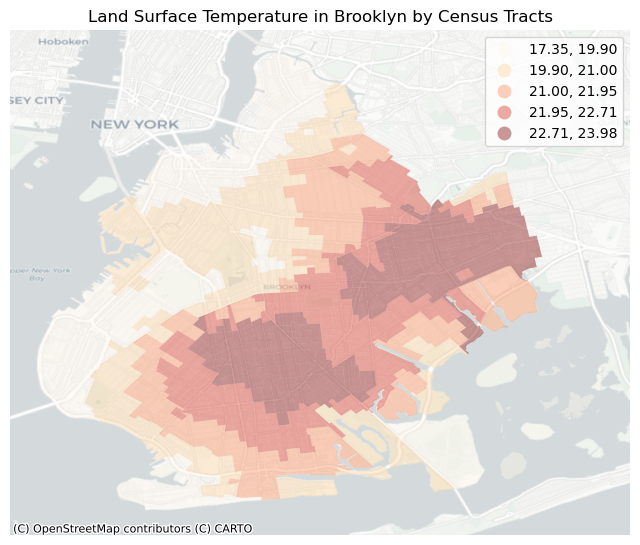

In [179]:
ax = bk_lst.plot(column='population', scheme='quantiles', k=5, legend=True, cmap='OrRd', alpha=0.4,
                 legend_kwds={'loc': 'upper right'})

#BK_CT.plot(facecolor = 'none', alpha=0.5, edgecolor='black', linewidth=0.75, ax=ax)
plt.title('Land Surface Temperature in Brooklyn by Census Tracts')

cx.add_basemap(ax,source=cx.providers.CartoDB.Positron,crs=bk_lst.crs)
ax.axis('off');

In [188]:
bk_lst

,shape_area,ntaname,cdtaname,shape_leng,boroname,ct2020,nta2020,borocode,cdeligibil,geoid,boroct2020,cdta2020,ctlabel,geometry,area_sq_miles,population,population_per_sq_mile
1392,2224101.05222,Brooklyn Heights,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,6611.44395971,Brooklyn,000100,BK0201,3,None,36047000100,3000100,BK02,1,"MULTIPOLYGON (((-73.99093 40.70077, -73.99087 ...",0.079781,17.928614,224.722290
1393,2952085.24731,Sunset Park (West),BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,9075.2851212,Brooklyn,000200,BK0702,3,None,36047000200,3000200,BK07,2,"MULTIPOLYGON (((-74.00628 40.65543, -74.00687 ...",0.105891,19.985636,188.737362
1394,2164337.28426,Brooklyn Heights,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,6525.11133824,Brooklyn,000301,BK0201,3,None,36047000301,3000301,BK02,3.01,"MULTIPOLYGON (((-73.99429 40.69854, -73.99460 ...",0.077635,17.928614,230.934018
1395,901507.030199,Brooklyn Heights,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,4828.17027571,Brooklyn,000501,BK0201,3,None,36047000501,3000501,BK02,5.01,"MULTIPOLYGON (((-73.99302 40.69746, -73.99379 ...",0.032337,17.928614,554.427166
1396,1041529.09064,Brooklyn Heights,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,4902.47968489,Brooklyn,000502,BK0201,3,None,36047000502,3000502,BK02,5.02,"MULTIPOLYGON (((-73.99137 40.69701, -73.99128 ...",0.037360,17.928614,479.890763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,1784336.19679,Bedford-Stuyvesant (East),BK03 Bedford-Stuyvesant (CD 3 Approximation),6580.12095378,Brooklyn,028900,BK0302,3,None,36047028900,3028900,BK03,289,"MULTIPOLYGON (((-73.92778 40.69276, -73.92751 ...",0.064005,21.779340,340.277892
2310,2043908.71612,Bushwick (West),BK04 Bushwick (CD 4 Equivalent),6715.30748825,Brooklyn,039300,BK0401,3,None,36047039300,3039300,BK04,393,"MULTIPOLYGON (((-73.92648 40.69414, -73.92778 ...",0.073315,21.961155,299.543745
2314,1415207.46552,East New York-City Line,BK05 East New York-Cypress Hills (CD 5 Approxi...,5801.670964,Brooklyn,118600,BK0505,3,None,36047118600,3118600,BK05,1186,"MULTIPOLYGON (((-73.86410 40.68237, -73.86399 ...",0.050764,22.895645,451.024518
2315,27324218.9377,Prospect Park,BK55 Prospect Park (JIA 55 Approximation),24199.0689022,Brooklyn,017700,BK5591,3,None,36047017700,3017700,BK55,177,"MULTIPOLYGON (((-73.96748 40.67286, -73.96713 ...",0.980114,19.923267,20.327508
